In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Read Excel file into database
df = pd.read_excel('RollerCoasterData.xlsx',
                                  index_col=False,
                                  keep_default_na=True
                                 )
df.head(50)

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees)
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,NaN,01:32:00,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,NaN,01:00:00,4.0,NaN
2,Adrenaline Peak,Oaks Amusement Park,Portland,Oregon,United States,North America,Steel,Sit Down,Operating,2018.0,72,45.0,1050.0,YES,3.0,NaN,NaN,NaN,97.0
3,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113,62.0,2956.0,YES,6.0,NaN,02:47:00,NaN,NaN
4,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195,67.0,3828.0,YES,6.0,170.0,03:10:00,3.7,NaN
5,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,NaN,NaN,4.3,NaN
6,Altair,Cinecittà World,Rome,Rome,Italy,Europe,Steel,Sit Down,Operating,2014.0,108.3,52.8,2879.8,YES,10.0,NaN,NaN,NaN,NaN
7,American Eagle,Six Flags Great America,Gurnee,Illinois,United States,North America,Wood,Sit Down,Operating,1981.0,127,66.0,4650.0,NO,0.0,147.0,02:23:00,NaN,55.0
8,Anaconda,Walygator Parc,Maizieres-les-Metz,Lorraine,France,Europe,Wood,Sit Down,Operating,1989.0,118.1,55.9,3937.0,NO,0.0,40.0,02:10:00,NaN,NaN
9,Apocalypse,Six Flags America,Upper Marlboro,Maryland,United States,North America,Steel,Stand Up,Operating,2012.0,100,55.0,2900.0,YES,2.0,90.0,02:00:00,NaN,NaN


In [3]:
# Clean up data

# Delete primary data source links
df = df[:-5]

names = df.Name.copy()
for index, row in df.iterrows():
    # Rename roller coasters with the same name to include their park
    if (names == row.Name).sum() > 1:
        df.at[index, 'Name'] = row.Name + ' (' + row.Park + ')'
    
    # Change Construction strings to numbers
    if 'Wood' in row['Construction']:
        df.at[index, 'Construction'] = 1
    elif 'Steel' in row['Construction']:
        df.at[index, 'Construction'] = 2

    # Convert height to float
    if isinstance(row['Height (feet)'], str):
        df.at[index, 'Height (feet)'] = float(row['Height (feet)'].split()[0])
        
    # Convert Duration to seconds
    if not pd.isna(row['Duration (min:sec)']):
        df.at[index, 'Duration (min:sec)'] = row['Duration (min:sec)'].hour * 60 + row['Duration (min:sec)'].minute
    
# Delete unneeded columns
df.drop('Park', axis=1, inplace=True)
df.drop('City/Region', axis=1, inplace=True)
df.drop('City/State/Region', axis=1, inplace=True)
df.drop('Country/Region', axis=1, inplace=True)
df.drop('Geographic Region', axis=1, inplace=True)
df.drop('Status', axis=1, inplace=True)
df.drop('Year/Date Opened', axis=1, inplace=True)
df.drop('Type', axis=1, inplace=True)
df.drop('Inversions (YES or NO)', axis=1, inplace=True)

In [4]:
df.head(300)

,Name,Construction,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees)
0,10 Inversion Roller Coaster,2,98.4,45.000000,2788.800000,10.0,NaN,92,NaN,NaN
1,Abismo,2,151.6,65.200000,1476.400000,2.0,NaN,60,4.0,NaN
2,Adrenaline Peak,2,72,45.000000,1050.000000,3.0,NaN,NaN,NaN,97.0
3,Afterburn,2,113,62.000000,2956.000000,6.0,NaN,167,NaN,NaN
4,Alpengeist,2,195,67.000000,3828.000000,6.0,170.0,190,3.7,NaN
...,...,...,...,...,...,...,...,...,...,...
295,Wildfire,1,183.8,71.500000,4150.300000,3.0,160.8,120,4.0,83.0
296,Winjas,2,57.1,41.000000,1526.600000,0.0,52.5,NaN,NaN,NaN
297,Wodan Timbur Coaster,1,131.3,62.100000,3444.900000,0.0,NaN,205,3.5,NaN
298,X2,2,175,76.000000,3610.000000,2.0,215.0,NaN,4.0,88.5


Pearson's Correlation: 0.9462904552196303


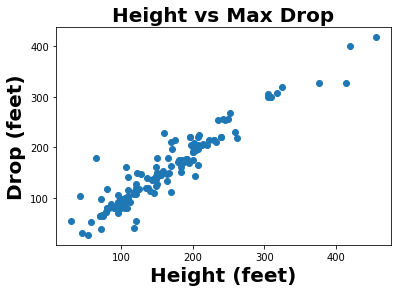

In [5]:
# Compare height vs max drop variables
heightDrop = df[['Height (feet)', 'Drop (feet)']].dropna()

corr, _ = pearsonr(heightDrop['Height (feet)'], heightDrop['Drop (feet)'])
print('Pearson\'s Correlation:', corr)

plt.scatter(heightDrop['Height (feet)'], heightDrop['Drop (feet)'])
plt.xlabel('Height (feet)', fontsize=20, weight='bold')
plt.ylabel('Drop (feet)', fontsize=20, weight='bold')
plt.title('Height vs Max Drop', fontsize=20, weight='bold')
plt.rc('font', size=15)
plt.show()

In [6]:
# Delete one of the variables since they are similar
df.drop('Drop (feet)', axis=1, inplace=True)

Pearson's Correlation: 0.620222832260476


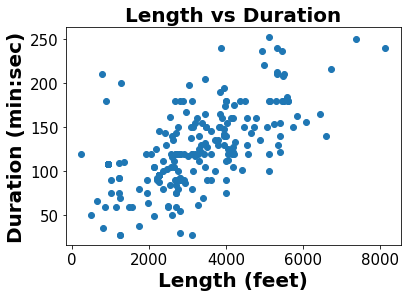

In [7]:
# Compare length vs duration variables
lengthDuration = df[['Length (feet)', 'Duration (min:sec)']].dropna()

corr, _ = pearsonr(lengthDuration['Length (feet)'], lengthDuration['Duration (min:sec)'])
print('Pearson\'s Correlation:', corr)

plt.scatter(lengthDuration['Length (feet)'], lengthDuration['Duration (min:sec)'])
plt.xlabel('Length (feet)', fontsize=20, weight='bold')
plt.ylabel('Duration (min:sec)', fontsize=20, weight='bold')
plt.title('Length vs Duration', fontsize=20, weight='bold')
plt.rc('font', size=15)
plt.show()

In [8]:
# Delete one of the variables since they are similar
df.drop('Duration (min:sec)', axis=1, inplace=True)

In [11]:
df.head(300)

,Name,Construction,Height (feet),Speed (mph),Length (feet),Number of Inversions,G Force,Vertical Angle (degrees)
0,10 Inversion Roller Coaster,2,98.4,45.000000,2788.800000,10.0,NaN,NaN
1,Abismo,2,151.6,65.200000,1476.400000,2.0,4.0,NaN
2,Adrenaline Peak,2,72,45.000000,1050.000000,3.0,NaN,97.0
3,Afterburn,2,113,62.000000,2956.000000,6.0,NaN,NaN
4,Alpengeist,2,195,67.000000,3828.000000,6.0,3.7,NaN
...,...,...,...,...,...,...,...,...
295,Wildfire,1,183.8,71.500000,4150.300000,3.0,4.0,83.0
296,Winjas,2,57.1,41.000000,1526.600000,0.0,NaN,NaN
297,Wodan Timbur Coaster,1,131.3,62.100000,3444.900000,0.0,3.5,NaN
298,X2,2,175,76.000000,3610.000000,2.0,4.0,88.5
